In [1]:
N_SUBJECTS = 4
MODELS = ['dVAE', 'VAE', 'VGG24']
subject_one = {
    'VGG24': (.026, .224),
    'VAE': (.008, .228),
    'dVAE': (.040, .241),
}
subject_two = {
    'VGG24': (.088, .273),
    'VAE': (.023, .265),
    'dVAE': (.041, .264),
}
subject_three = {
    'VGG24': (-.036, .219),
    'VAE': (.013, .204),
    'dVAE': (.035, .204),
}
subject_four = {
    'VGG24': (.155, .224),
    'VAE': (.217, .233),
    'dVAE': (.188, .232),
}

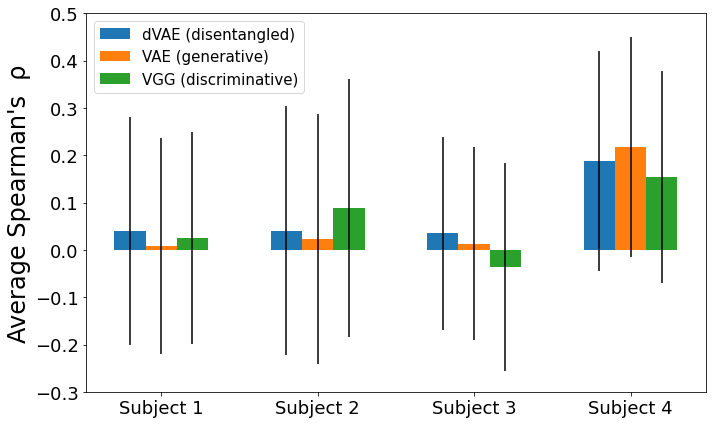

In [48]:
import numpy as np
import matplotlib.pyplot as plt

big_font = 24
medium_font=18


# Bar chart
fig, ax = plt.subplots(figsize=(10,6))
labels = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

dvae_correlations = [subject_one['dVAE'][0], subject_two['dVAE'][0], subject_three['dVAE'][0], subject_four['dVAE'][0]]
dvae_std = [subject_one['dVAE'][1], subject_two['dVAE'][1], subject_three['dVAE'][1], subject_four['dVAE'][1]]

vae_correlations = [subject_one['VAE'][0], subject_two['VAE'][0], subject_three['VAE'][0], subject_four['VAE'][0]]
vae_std = [subject_one['VAE'][1], subject_two['VAE'][1], subject_three['VAE'][1], subject_four['VAE'][1]]


vgg_correlations = [subject_one['VGG24'][0], subject_two['VGG24'][0], subject_three['VGG24'][0], subject_four['VGG24'][0]]
vgg_std = [subject_one['VGG24'][1], subject_two['VGG24'][1], subject_three['VGG24'][1], subject_four['VGG24'][1]]


rects1 = ax.bar(x - width, dvae_correlations, width, label='dVAE (disentangled)', yerr=dvae_std)
rects2 = ax.bar(x, vae_correlations, width, label='VAE (generative)', yerr=vae_std)
rects3 = ax.bar(x + width, vgg_correlations, width, label='VGG (discriminative)', yerr=vgg_std)

    
#plt.plot([-width*1.5,width*1.5], [split_test_average[0], split_test_average[0]], '--', label='Split half', color='gray')
#plt.plot([1-width*1.5,1+width*1.5], [split_test_average[1], split_test_average[1]], '--', color='gray')
#plt.plot([2-width*1.5,2+width*1.5], [split_test_average[2], split_test_average[2]], '--', color='gray')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Spearman\'s  ρ',fontsize=big_font)
#ax.set_title('Average subject', fontsize=big_font)
ax.set_xticks(x)
ax.tick_params(axis='y', labelsize=medium_font )
#ax.set_xlabel('Subject',fontsize=big_font)
ax.set_xticklabels(labels, fontsize=medium_font)
ax.set_ylim([-.3, .5])
plt.legend(prop={'size': 15}, loc='upper left')
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout()
#plt.savefig('average_subject_correlation.pdf')

plt.show()


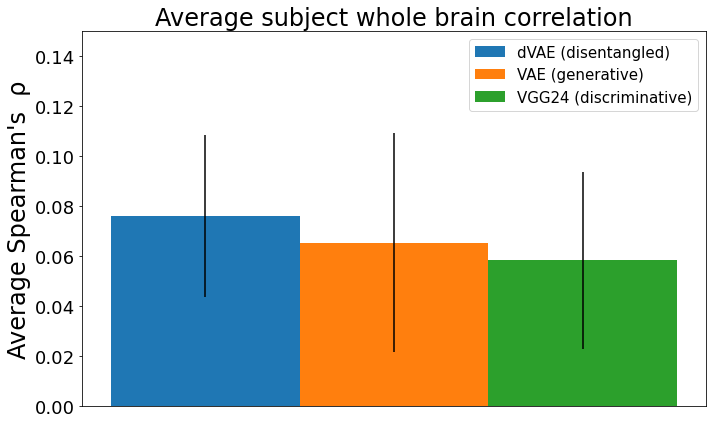

In [59]:
average_dvae = np.mean(dvae_correlations)
average_vae = np.mean(vae_correlations)
average_vgg = np.mean(vgg_correlations)

fig, ax = plt.subplots(figsize=(10,6))
x = 0
ax.bar(x-width, average_dvae, width, label='dVAE (disentangled)', yerr=np.std(dvae_correlations)/2)
ax.bar(x, average_vae, width, label='VAE (generative)', yerr=np.std(vae_correlations)/2)
ax.bar(x+width, average_vgg, width, label='VGG24 (discriminative)', yerr=np.std(vgg_correlations)/2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Spearman\'s  ρ',fontsize=big_font)
ax.set_title('Average subject whole brain correlation', fontsize=big_font)
ax.tick_params(axis='y', labelsize=medium_font )
#ax.set_xlabel('Subject',fontsize=big_font)
ax.legend()
ax.set_ylim([0, .15])
ax.get_xaxis().set_visible(False)
plt.legend(prop={'size': 15})
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout()
#plt.savefig('average_subject_correlation.pdf')


In [55]:
np.std(average_dvae)

0.0

0.076